# Toy model of predictive coding in integrator neural network

Supplementary code for the paper
<br>
Sergey Sukhov and Bulat Batuev "Toy models of predictive coding for dynamic spiking neural networks".

The code contains the toy model of predictive coding using integrator network.
The error signal teaches the integrator of upper neuronal level to reproduce the value of lower level. The error becomes zero when finished teaching. The input signal and the signal from integrator specify the current error. The neural networks are implemented in Nengo.

integrator part is taken from Nengo examples
https://www.nengo.ai/nengo/examples/dynamics/integrator.html
<br>
Integrator equation
dx/dt = u(t)/$\tau_p$
where u(t) is the input stimulus, $\tau_p$ is the characteristic time of perception of the network

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import nengo
from nengo.processes import Piecewise

## Construct network

In [2]:
model = nengo.Network()

# Parameters
tau_synapse = 0.2 # should be reasonably large
tau_p = 0.1 # characteristic time of perception

with model:
    err = nengo.Ensemble(n_neurons=100, dimensions=1)
    layer1 = nengo.Ensemble(n_neurons=100, dimensions=1)
    stim = nengo.Node(Piecewise({0: 0, 0.05: 1, 0.5: -2}))
    layer2 = nengo.Ensemble(n_neurons=100, dimensions=1)
    nengo.Connection(stim,layer1)
    nengo.Connection(layer1, err)
    
    def forward(u):
        return tau_synapse*u/tau_p
    # feedforward error
    nengo.Connection(err, layer2, function=forward, synapse=tau_synapse)
    
    def recurrent(x):
        return x
    nengo.Connection(layer2, layer2, function=recurrent, synapse=tau_synapse)
    
    nengo.Connection(layer2, err, transform=-1) # feedback to the error population

## Add probes

In [3]:
with model:
    layer1_probe = nengo.Probe(layer1, synapse=0.01)
    error_probe = nengo.Probe(err, synapse=0.01)
    layer2_probe = nengo.Probe(layer2, synapse=0.01)

## Run the model

In [4]:
# Create simulator
with nengo.Simulator(model) as sim:
    # Run it for several seconds
    sim.run(1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

## Plot the results

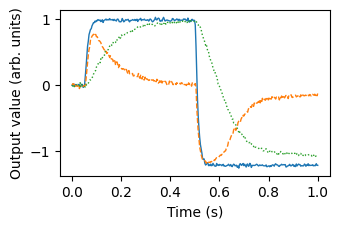

In [6]:
# Plot the decoded output of the ensemble
n = 3 # plot every n-th point
x = sim.trange()[::n]
y1 = sim.data[layer1_probe][::n]
y2 = sim.data[error_probe][::n]
y3 = sim.data[layer2_probe][::n]

width = 3.487
height = width / 1.618

fig = plt.figure(figsize=(width,height))
plt.plot(x, y1, label="Layer 1 output", linewidth=1)
plt.plot(x, y2, label="Error", linewidth=1, linestyle='dashed')
plt.plot(x, y3, label="Layer 2 output", linewidth=1, linestyle='dotted')
plt.xlabel("Time (s)", fontsize=10)
plt.ylabel("Output value (arb. units)", fontsize=10)
#plt.legend()

# save the figure if necessary
plt.savefig('Integrator.svg', bbox_inches='tight')

In [7]:
# # save data for further use 
# import pandas as pd

# data = {'time': sim.trange(),
#         'layer1_output': sim.data[layer1_probe].squeeze(),
#         'error': sim.data[error_probe].squeeze(),
#         'layer2_output': sim.data[layer2_probe].squeeze()}
# df = pd.DataFrame(data)
# df.to_pickle('Integrator.pkl')
# # df = pd.read_pickle('PCL_Nengo.pkl')